In [135]:
import numpy as np
from scipy.stats import t, ttest_ind, ttest_ind_from_stats
import pandas as pd
import math
import seaborn as sns

In [136]:
dff=pd.read_excel('India_Interpolated_Rainy_Days_RW1.xlsx')
dff

,State,Area,Latitude,Longitude,fid,Altitude,1988,1989,1990,1991,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Karnataka,3.072701e+05,13.094437,78.284459,677,785.244,84,78,85,98,...,102,91,120,72,114,91,103,108,128,122
1,Karnataka,1.394675e+05,13.083870,78.292082,678,791.252,84,78,85,99,...,102,91,119,72,113,90,103,108,128,121
2,Karnataka,5.497562e+05,13.121554,78.343837,675,816.344,93,78,89,98,...,99,89,118,76,114,89,102,109,126,119
3,Karnataka,5.240948e+05,13.747866,77.552639,676,664.240,98,75,83,76,...,103,81,111,67,89,67,86,109,113,106
4,Karnataka,1.701728e+06,13.551716,77.514227,665,717.342,86,70,84,51,...,117,102,123,87,112,88,110,122,137,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,Karnataka,7.881447e+04,14.180133,77.440353,620,573.258,73,57,63,80,...,102,66,98,59,76,53,77,90,98,92
1359,Karnataka,3.716641e+05,13.210334,77.690065,673,915.748,79,77,83,105,...,110,101,130,104,134,104,123,125,146,135
1360,Karnataka,1.102231e+05,13.174928,78.564213,674,747.098,95,81,96,103,...,100,88,111,73,110,82,103,109,120,118
1361,Karnataka,2.100939e+06,13.690012,76.649036,671,667.719,71,62,57,56,...,96,90,109,71,101,88,106,103,128,119


In [137]:
df1=pd.read_excel('d1.xlsx')
df1

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,95,81,73,100,124,96,110,121,122,119
1,95,81,73,100,124,97,112,122,124,120
2,100,82,79,100,132,98,112,120,116,120
3,72,66,54,70,95,70,94,90,80,100
4,91,68,57,77,88,68,98,99,83,111
...,...,...,...,...,...,...,...,...,...,...
1358,75,54,58,105,95,90,107,102,93,114
1359,76,55,68,93,107,67,104,112,97,149
1360,104,81,85,104,141,118,130,138,121,118
1361,58,58,45,95,83,61,85,89,89,103


In [138]:
df2=pd.read_excel('d2.xlsx')
df2

,State,Area,Latitude,Longitude,fid,Altitude,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Karnataka,3.072701e+05,13.094437,78.284459,677,785.244,102,91,120,72,114,91,103,108,128,122
1,Karnataka,1.394675e+05,13.083870,78.292082,678,791.252,102,91,119,72,113,90,103,108,128,121
2,Karnataka,5.497562e+05,13.121554,78.343837,675,816.344,99,89,118,76,114,89,102,109,126,119
3,Karnataka,5.240948e+05,13.747866,77.552639,676,664.240,103,81,111,67,89,67,86,109,113,106
4,Karnataka,1.701728e+06,13.551716,77.514227,665,717.342,117,102,123,87,112,88,110,122,137,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,Karnataka,7.881447e+04,14.180133,77.440353,620,573.258,102,66,98,59,76,53,77,90,98,92
1359,Karnataka,3.716641e+05,13.210334,77.690065,673,915.748,110,101,130,104,134,104,123,125,146,135
1360,Karnataka,1.102231e+05,13.174928,78.564213,674,747.098,100,88,111,73,110,82,103,109,120,118
1361,Karnataka,2.100939e+06,13.690012,76.649036,671,667.719,96,90,109,71,101,88,106,103,128,119


In [139]:
del df2['State'] 
del df2['Latitude'] 
del df2['Longitude'] 
del df2['Area'] 
del df2['fid'] 
del df2['Altitude']
df2

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,102,91,120,72,114,91,103,108,128,122
1,102,91,119,72,113,90,103,108,128,121
2,99,89,118,76,114,89,102,109,126,119
3,103,81,111,67,89,67,86,109,113,106
4,117,102,123,87,112,88,110,122,137,130
...,...,...,...,...,...,...,...,...,...,...
1358,102,66,98,59,76,53,77,90,98,92
1359,110,101,130,104,134,104,123,125,146,135
1360,100,88,111,73,110,82,103,109,120,118
1361,96,90,109,71,101,88,106,103,128,119


In [140]:

df1

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,95,81,73,100,124,96,110,121,122,119
1,95,81,73,100,124,97,112,122,124,120
2,100,82,79,100,132,98,112,120,116,120
3,72,66,54,70,95,70,94,90,80,100
4,91,68,57,77,88,68,98,99,83,111
...,...,...,...,...,...,...,...,...,...,...
1358,75,54,58,105,95,90,107,102,93,114
1359,76,55,68,93,107,67,104,112,97,149
1360,104,81,85,104,141,118,130,138,121,118
1361,58,58,45,95,83,61,85,89,89,103


In [141]:
for i in range(0,10,1):
    t_stat, p_value = ttest_ind(df1, df2,axis=1)
    p_values = p_value

In [142]:
len(p_values)

1363

In [143]:
file_path = 'India_Interpolated_Rainy_Days_RW.xlsx'
df=pd.read_excel(file_path)
df['t_statistics']=t_stat
df['p_values']=p_values

In [144]:
df.to_excel(file_path, index=False)

In [145]:
del df['trend']
del df['trend_type']

In [146]:
del df['tau']
del df['p_value']

In [147]:
del df['Unnamed: 0']

In [148]:
df

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2015,2016,2017,2018,2019,2020,2021,2022,t_statistics,p_values
0,84,78,85,98,80,96,101,103,112,96,...,120,72,114,91,103,108,128,122,-0.127322,0.900097
1,84,78,85,99,80,97,102,103,112,96,...,119,72,113,90,103,108,128,121,0.012621,0.990069
2,93,78,89,98,82,98,103,105,113,100,...,118,76,114,89,102,109,126,119,0.243012,0.810744
3,98,75,83,76,72,84,71,87,89,86,...,111,67,89,67,86,109,113,106,-1.919063,0.070974
4,86,70,84,51,89,85,74,89,92,88,...,123,87,112,88,110,122,137,130,-3.864080,0.001137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,73,57,63,80,80,72,73,66,82,67,...,98,59,76,53,77,90,98,92,0.960249,0.349652
1359,79,77,83,105,84,95,92,94,85,88,...,130,104,134,104,123,125,146,135,-2.831643,0.011060
1360,95,81,96,103,87,113,110,106,116,110,...,111,73,110,82,103,109,120,118,1.545189,0.139701
1361,71,62,57,56,71,67,54,50,63,62,...,109,71,101,88,106,103,128,119,-3.065348,0.006665


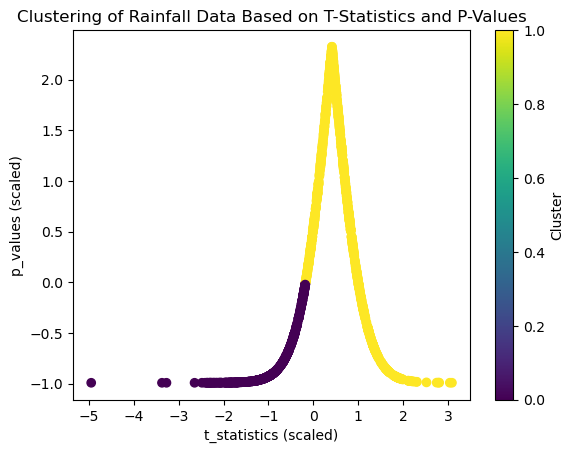

      1988  1989  1990  1991  1992  1993  1994  1995  1996  1997  ...  2016  \
0       84    78    85    98    80    96   101   103   112    96  ...    72   
1       84    78    85    99    80    97   102   103   112    96  ...    72   
2       93    78    89    98    82    98   103   105   113   100  ...    76   
3       98    75    83    76    72    84    71    87    89    86  ...    67   
4       86    70    84    51    89    85    74    89    92    88  ...    87   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1358    73    57    63    80    80    72    73    66    82    67  ...    59   
1359    79    77    83   105    84    95    92    94    85    88  ...   104   
1360    95    81    96   103    87   113   110   106   116   110  ...    73   
1361    71    62    57    56    71    67    54    50    63    62  ...    71   
1362    86    77    90    91    83    86    77    88    87    93  ...    87   

      2017  2018  2019  2020  2021  2022  t_statist

In [149]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# Step 3: Clustering
# Create feature vectors using t-statistics and p-values
features = df[['t_statistics', 'p_values']].values

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(features_scaled)
labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['Cluster'] = labels

# Plot clustering results
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=labels, cmap='viridis')
plt.xlabel('t_statistics (scaled)')
plt.ylabel('p_values (scaled)')
plt.title('Clustering of Rainfall Data Based on T-Statistics and P-Values')
plt.colorbar(label='Cluster')
plt.show()

# Print resulting clusters
print(df)


In [150]:
from sklearn.preprocessing import StandardScaler

# Selecting features
features = dff[['Latitude', 'Longitude', 'Altitude']]

# Standardizing the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [151]:
from sklearn.cluster import KMeans

# Determining the number of clusters using the Elbow Method (here, we'll use 2 clusters for simplicity)
kmeans = KMeans(n_clusters=2, random_state=0)

# Fitting the model
kmeans.fit(features_scaled)
df['cluster'] = kmeans.labels_


# CLUSTERS BASED ON LATITUDE AND LONGITUDE

In [164]:
rainfall_columns = [2013,2014,2015,2016, 2017, 2018, 2019, 2020, 2021, 2022]
dff['Avg_Rainfall'] = dff[rainfall_columns].mean(axis=1)
dff

,State,Area,Latitude,Longitude,fid,Altitude,1988,1989,1990,1991,...,2016,2017,2018,2019,2020,2021,2022,Cluster1,Avg_Rainfall,Rainfall_Cluster1
0,Karnataka,3.072701e+05,13.094437,78.284459,677,785.244,84,78,85,98,...,72,114,91,103,108,128,122,1,105.1,High Rainfall
1,Karnataka,1.394675e+05,13.083870,78.292082,678,791.252,84,78,85,99,...,72,113,90,103,108,128,121,1,104.7,High Rainfall
2,Karnataka,5.497562e+05,13.121554,78.343837,675,816.344,93,78,89,98,...,76,114,89,102,109,126,119,1,104.1,High Rainfall
3,Karnataka,5.240948e+05,13.747866,77.552639,676,664.240,98,75,83,76,...,67,89,67,86,109,113,106,1,93.2,High Rainfall
4,Karnataka,1.701728e+06,13.551716,77.514227,665,717.342,86,70,84,51,...,87,112,88,110,122,137,130,1,112.8,High Rainfall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,Karnataka,7.881447e+04,14.180133,77.440353,620,573.258,73,57,63,80,...,59,76,53,77,90,98,92,1,81.1,High Rainfall
1359,Karnataka,3.716641e+05,13.210334,77.690065,673,915.748,79,77,83,105,...,104,134,104,123,125,146,135,1,121.2,High Rainfall
1360,Karnataka,1.102231e+05,13.174928,78.564213,674,747.098,95,81,96,103,...,73,110,82,103,109,120,118,1,101.4,High Rainfall
1361,Karnataka,2.100939e+06,13.690012,76.649036,671,667.719,71,62,57,56,...,71,101,88,106,103,128,119,1,101.1,High Rainfall


In [165]:
kmeans = KMeans(n_clusters=2, random_state=42)
dff['Cluster1'] = kmeans.fit_predict(features_scaled)

In [166]:
cluster_analysis = dff.groupby('Cluster1')['Avg_Rainfall'].mean()

# Printing the results
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster Analysis:\n", cluster_analysis)

Cluster Centers:
 [[ 1.34147009 -0.79673267 -0.63199999]
 [-0.48148478  0.28596586  0.22683948]]

Cluster Analysis:
 Cluster1
0     65.441111
1    100.952742
Name: Avg_Rainfall, dtype: float64


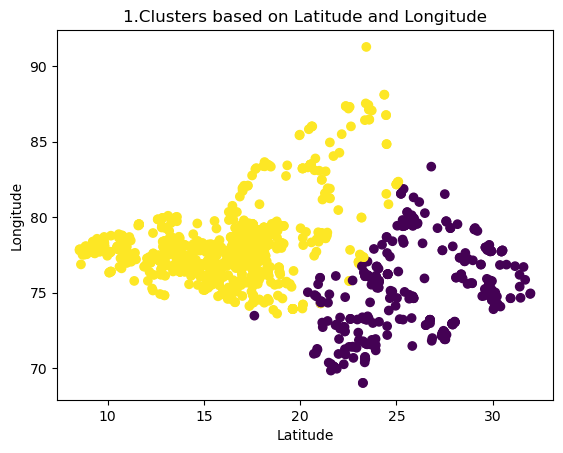

In [167]:
import matplotlib.pyplot as plt
plt.scatter(dff['Latitude'], dff['Longitude'],c=dff['Cluster1'], cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('1.Clusters based on Latitude and Longitude')
plt.show()

In [168]:
high_rainfall_cluster = cluster_analysis.idxmax()
low_rainfall_cluster = cluster_analysis.idxmin()


In [169]:
print("High Rainfall Cluster:", high_rainfall_cluster)
print("Low Rainfall Cluster:", low_rainfall_cluster)


High Rainfall Cluster: 1
Low Rainfall Cluster: 0


In [170]:
dff['Rainfall_Cluster1'] = dff['Cluster1'].apply(lambda x: 'High Rainfall' if x == high_rainfall_cluster else 'Low Rainfall')

In [171]:
print(dff[['Latitude', 'Longitude', 'Altitude', 'Cluster1', 'Rainfall_Cluster1', 'Avg_Rainfall']])

       Latitude  Longitude  Altitude  Cluster1 Rainfall_Cluster1  Avg_Rainfall
0     13.094437  78.284459   785.244         1     High Rainfall         105.1
1     13.083870  78.292082   791.252         1     High Rainfall         104.7
2     13.121554  78.343837   816.344         1     High Rainfall         104.1
3     13.747866  77.552639   664.240         1     High Rainfall          93.2
4     13.551716  77.514227   717.342         1     High Rainfall         112.8
...         ...        ...       ...       ...               ...           ...
1358  14.180133  77.440353   573.258         1     High Rainfall          81.1
1359  13.210334  77.690065   915.748         1     High Rainfall         121.2
1360  13.174928  78.564213   747.098         1     High Rainfall         101.4
1361  13.690012  76.649036   667.719         1     High Rainfall         101.1
1362  13.214725  78.097977   827.234         1     High Rainfall         108.5

[1363 rows x 6 columns]


In [172]:

dff


,State,Area,Latitude,Longitude,fid,Altitude,1988,1989,1990,1991,...,2016,2017,2018,2019,2020,2021,2022,Cluster1,Avg_Rainfall,Rainfall_Cluster1
0,Karnataka,3.072701e+05,13.094437,78.284459,677,785.244,84,78,85,98,...,72,114,91,103,108,128,122,1,105.1,High Rainfall
1,Karnataka,1.394675e+05,13.083870,78.292082,678,791.252,84,78,85,99,...,72,113,90,103,108,128,121,1,104.7,High Rainfall
2,Karnataka,5.497562e+05,13.121554,78.343837,675,816.344,93,78,89,98,...,76,114,89,102,109,126,119,1,104.1,High Rainfall
3,Karnataka,5.240948e+05,13.747866,77.552639,676,664.240,98,75,83,76,...,67,89,67,86,109,113,106,1,93.2,High Rainfall
4,Karnataka,1.701728e+06,13.551716,77.514227,665,717.342,86,70,84,51,...,87,112,88,110,122,137,130,1,112.8,High Rainfall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,Karnataka,7.881447e+04,14.180133,77.440353,620,573.258,73,57,63,80,...,59,76,53,77,90,98,92,1,81.1,High Rainfall
1359,Karnataka,3.716641e+05,13.210334,77.690065,673,915.748,79,77,83,105,...,104,134,104,123,125,146,135,1,121.2,High Rainfall
1360,Karnataka,1.102231e+05,13.174928,78.564213,674,747.098,95,81,96,103,...,73,110,82,103,109,120,118,1,101.4,High Rainfall
1361,Karnataka,2.100939e+06,13.690012,76.649036,671,667.719,71,62,57,56,...,71,101,88,106,103,128,119,1,101.1,High Rainfall


# CLUSTERS BASED ON LONGITUDE AND ALTITUDE

In [173]:
kmeans = KMeans(n_clusters=2, random_state=42)
dff['Cluster2'] = kmeans.fit_predict(features_scaled)

In [174]:
cluster_analysis = dff.groupby('Cluster2')['Avg_Rainfall'].mean()

# Printing the results
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster Analysis:\n", cluster_analysis)

Cluster Centers:
 [[ 1.34147009 -0.79673267 -0.63199999]
 [-0.48148478  0.28596586  0.22683948]]

Cluster Analysis:
 Cluster2
0     65.441111
1    100.952742
Name: Avg_Rainfall, dtype: float64


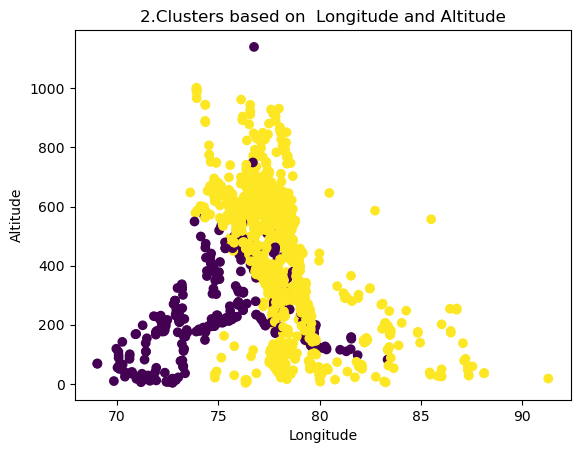

In [175]:
import matplotlib.pyplot as plt
plt.scatter(dff['Longitude'], dff['Altitude'],c=dff['Cluster2'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Altitude')
plt.title('2.Clusters based on  Longitude and Altitude')
plt.show()

In [176]:
high_rainfall_cluster = cluster_analysis.idxmax()
low_rainfall_cluster = cluster_analysis.idxmin()
print("High Rainfall Cluster:", high_rainfall_cluster)
print("Low Rainfall Cluster:", low_rainfall_cluster)

High Rainfall Cluster: 1
Low Rainfall Cluster: 0


In [177]:
dff['Rainfall_Cluster2'] = dff['Cluster2'].apply(lambda x: 'High Rainfall' if x == high_rainfall_cluster else 'Low Rainfall')

In [178]:
print(dff[['Latitude', 'Longitude', 'Altitude', 'Cluster2', 'Rainfall_Cluster2', 'Avg_Rainfall']])

       Latitude  Longitude  Altitude  Cluster2 Rainfall_Cluster2  Avg_Rainfall
0     13.094437  78.284459   785.244         1     High Rainfall         105.1
1     13.083870  78.292082   791.252         1     High Rainfall         104.7
2     13.121554  78.343837   816.344         1     High Rainfall         104.1
3     13.747866  77.552639   664.240         1     High Rainfall          93.2
4     13.551716  77.514227   717.342         1     High Rainfall         112.8
...         ...        ...       ...       ...               ...           ...
1358  14.180133  77.440353   573.258         1     High Rainfall          81.1
1359  13.210334  77.690065   915.748         1     High Rainfall         121.2
1360  13.174928  78.564213   747.098         1     High Rainfall         101.4
1361  13.690012  76.649036   667.719         1     High Rainfall         101.1
1362  13.214725  78.097977   827.234         1     High Rainfall         108.5

[1363 rows x 6 columns]


# CLUSTER BASED ON LATITUDE AND ALTITUDE

In [180]:
kmeans = KMeans(n_clusters=2, random_state=42)
dff['Cluster3'] = kmeans.fit_predict(features_scaled)

In [181]:
cluster_analysis = dff.groupby('Cluster3')['Avg_Rainfall'].mean()

# Printing the results
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster Analysis:\n", cluster_analysis)

Cluster Centers:
 [[ 1.34147009 -0.79673267 -0.63199999]
 [-0.48148478  0.28596586  0.22683948]]

Cluster Analysis:
 Cluster3
0     65.441111
1    100.952742
Name: Avg_Rainfall, dtype: float64


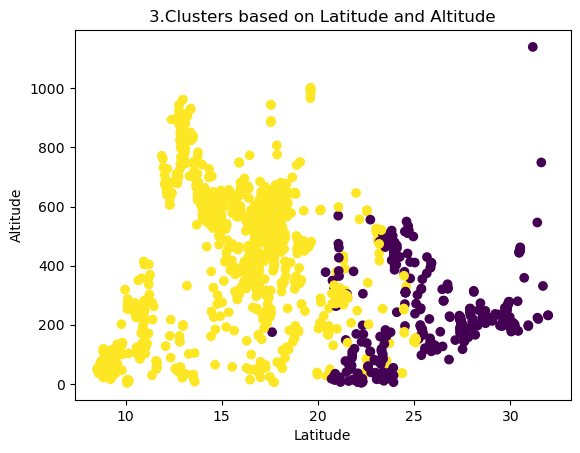

In [182]:
import matplotlib.pyplot as plt
plt.scatter(dff['Latitude'], dff['Altitude'],c=dff['Cluster3'], cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Altitude')
plt.title('3.Clusters based on Latitude and Altitude')
plt.show()

In [183]:
high_rainfall_cluster = cluster_analysis.idxmax()
low_rainfall_cluster = cluster_analysis.idxmin()
print("High Rainfall Cluster:", high_rainfall_cluster)
print("Low Rainfall Cluster:", low_rainfall_cluster)

High Rainfall Cluster: 1
Low Rainfall Cluster: 0


In [184]:
dff['Rainfall_Cluster3'] = dff['Cluster3'].apply(lambda x: 'High Rainfall' if x == high_rainfall_cluster else 'Low Rainfall')

In [185]:
print(dff[['Latitude', 'Longitude', 'Altitude', 'Cluster3', 'Rainfall_Cluster3', 'Avg_Rainfall']])

       Latitude  Longitude  Altitude  Cluster3 Rainfall_Cluster3  Avg_Rainfall
0     13.094437  78.284459   785.244         1     High Rainfall         105.1
1     13.083870  78.292082   791.252         1     High Rainfall         104.7
2     13.121554  78.343837   816.344         1     High Rainfall         104.1
3     13.747866  77.552639   664.240         1     High Rainfall          93.2
4     13.551716  77.514227   717.342         1     High Rainfall         112.8
...         ...        ...       ...       ...               ...           ...
1358  14.180133  77.440353   573.258         1     High Rainfall          81.1
1359  13.210334  77.690065   915.748         1     High Rainfall         121.2
1360  13.174928  78.564213   747.098         1     High Rainfall         101.4
1361  13.690012  76.649036   667.719         1     High Rainfall         101.1
1362  13.214725  78.097977   827.234         1     High Rainfall         108.5

[1363 rows x 6 columns]


# CLUSTERS BASED ON LATITUDE, LONGITUDE AND ALTITUDE

In [186]:
kmeans = KMeans(n_clusters=2, random_state=42)
dff['Cluster4'] = kmeans.fit_predict(features_scaled)

In [187]:
cluster_analysis = dff.groupby('Cluster4')['Avg_Rainfall'].mean()

# Printing the results
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("\nCluster Analysis:\n", cluster_analysis)

Cluster Centers:
 [[ 1.34147009 -0.79673267 -0.63199999]
 [-0.48148478  0.28596586  0.22683948]]

Cluster Analysis:
 Cluster4
0     65.441111
1    100.952742
Name: Avg_Rainfall, dtype: float64


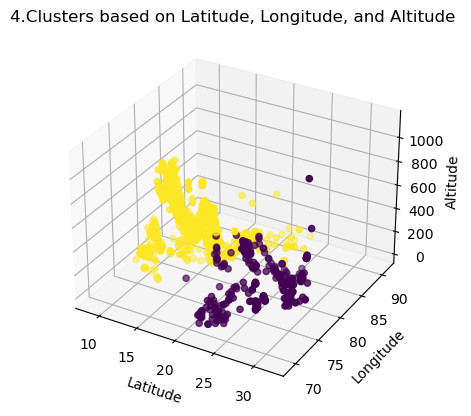

In [189]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(dff['Latitude'], dff['Longitude'], dff['Altitude'], c=dff['Cluster4'], cmap='viridis')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.set_zlabel('Altitude')
ax.set_title('4.Clusters based on Latitude, Longitude, and Altitude')
plt.show()

In [190]:
high_rainfall_cluster = cluster_analysis.idxmax()
low_rainfall_cluster = cluster_analysis.idxmin()
print("High Rainfall Cluster:", high_rainfall_cluster)
print("Low Rainfall Cluster:", low_rainfall_cluster)

High Rainfall Cluster: 1
Low Rainfall Cluster: 0


In [193]:
dff['Rainfall_Cluster4'] = dff['Cluster4'].apply(lambda x: 'High Rainfall' if x == high_rainfall_cluster else 'Low Rainfall')

In [194]:
print(dff[['Latitude', 'Longitude', 'Altitude', 'Cluster4', 'Rainfall_Cluster4', 'Avg_Rainfall']])

       Latitude  Longitude  Altitude  Cluster4 Rainfall_Cluster4  Avg_Rainfall
0     13.094437  78.284459   785.244         1     High Rainfall         105.1
1     13.083870  78.292082   791.252         1     High Rainfall         104.7
2     13.121554  78.343837   816.344         1     High Rainfall         104.1
3     13.747866  77.552639   664.240         1     High Rainfall          93.2
4     13.551716  77.514227   717.342         1     High Rainfall         112.8
...         ...        ...       ...       ...               ...           ...
1358  14.180133  77.440353   573.258         1     High Rainfall          81.1
1359  13.210334  77.690065   915.748         1     High Rainfall         121.2
1360  13.174928  78.564213   747.098         1     High Rainfall         101.4
1361  13.690012  76.649036   667.719         1     High Rainfall         101.1
1362  13.214725  78.097977   827.234         1     High Rainfall         108.5

[1363 rows x 6 columns]


In [196]:
dff.to_excel('final_outputs_clustering.xlsx', index=False)

In [197]:
dff

,State,Area,Latitude,Longitude,fid,Altitude,1988,1989,1990,1991,...,2022,Cluster1,Avg_Rainfall,Rainfall_Cluster1,Cluster2,Rainfall_Cluster2,Cluster3,Rainfall_Cluster3,Cluster4,Rainfall_Cluster4
0,Karnataka,3.072701e+05,13.094437,78.284459,677,785.244,84,78,85,98,...,122,1,105.1,High Rainfall,1,High Rainfall,1,High Rainfall,1,High Rainfall
1,Karnataka,1.394675e+05,13.083870,78.292082,678,791.252,84,78,85,99,...,121,1,104.7,High Rainfall,1,High Rainfall,1,High Rainfall,1,High Rainfall
2,Karnataka,5.497562e+05,13.121554,78.343837,675,816.344,93,78,89,98,...,119,1,104.1,High Rainfall,1,High Rainfall,1,High Rainfall,1,High Rainfall
3,Karnataka,5.240948e+05,13.747866,77.552639,676,664.240,98,75,83,76,...,106,1,93.2,High Rainfall,1,High Rainfall,1,High Rainfall,1,High Rainfall
4,Karnataka,1.701728e+06,13.551716,77.514227,665,717.342,86,70,84,51,...,130,1,112.8,High Rainfall,1,High Rainfall,1,High Rainfall,1,High Rainfall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,Karnataka,7.881447e+04,14.180133,77.440353,620,573.258,73,57,63,80,...,92,1,81.1,High Rainfall,1,High Rainfall,1,High Rainfall,1,High Rainfall
1359,Karnataka,3.716641e+05,13.210334,77.690065,673,915.748,79,77,83,105,...,135,1,121.2,High Rainfall,1,High Rainfall,1,High Rainfall,1,High Rainfall
1360,Karnataka,1.102231e+05,13.174928,78.564213,674,747.098,95,81,96,103,...,118,1,101.4,High Rainfall,1,High Rainfall,1,High Rainfall,1,High Rainfall
1361,Karnataka,2.100939e+06,13.690012,76.649036,671,667.719,71,62,57,56,...,119,1,101.1,High Rainfall,1,High Rainfall,1,High Rainfall,1,High Rainfall
